In [2]:

import tifffile
from pyometiff import OMETIFFReader
#import squidpy as sq
from scipy import ndimage
from matplotlib import pyplot as plt
import skimage.io
import skimage.measure
import skimage.segmentation
import numpy as np
import argparse
import os
import torch 
from cellpose import models,core
import logging
#models_logger = logging.getLogger(__name__)
#logging.basicConfig(level=logging.DEBUG)
#logging.getLogger('cellpose').setLevel(logging.DEBUG)
from cellpose import io 
logger = io.logger_setup()
from imageio.v2 import imread


/home/unimelb.edu.au/gargerd/anaconda3/envs/xenium/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-11-29 16:01:15,638 [INFO] WRITING LOG OUTPUT TO /home/unimelb.edu.au/gargerd/.cellpose/run.log
2023-11-29 16:01:15,640 [INFO] 
cellpose version: 	2.2.3.dev84+g167f273 
platform:       	linux 
python version: 	3.10.0 
torch version:  	1.13.1+cu117


In [4]:
os.getcwd()

'/home/unimelb.edu.au/gargerd/Atherosclerosis/atherosclerosis'

In [3]:
fn='../xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003370__P3_D__20230808__140759/morphology_mip.ome.tif'
fn='../xenium_data/20230808__140639__2311-01_Sachs_Panel1/output-XETG00050__0003370__P4_D__20230808__140759/morphology_mip.ome.tif'
#fn='../at3_1m4_01.tif'
#reader=OMETIFFReader(fpath=fn)
#img,metadata,xml_metadata=reader.read()
img=imread(fn)
img=img[0:31500,1000:]
print('Input image shape:',img.shape)


use_GPU = core.use_gpu()
model = models.Cellpose(gpu=False,model_type='cyto')
hyperparams={"batch_size":1,"channel_axis":None,"z_axis":None,"invert":False,"normalize":True,
            "diameter":30.0,"do_3D":False,"anisotropy":None,"net_avg":False,"augment":False,"tile":True,
            "tile_overlap":0.1,"resample":True,"interp":True,"flow_threshold":0.0,"cellprob_threshold":0.0,
            "min_size":15,"stitch_threshold":0.0,"rescale":False,"progress":False,"model_loaded":False}

from matplotlib import pyplot as plt
res, _, _, _ = model.eval(
            img,
            channels=[0, 0],
            **hyperparams)
           

Input image shape: (31500, 41650)
2023-11-29 16:01:55,505 [INFO] ** TORCH CUDA version installed and working. **
2023-11-29 16:01:55,508 [INFO] >>>> using CPU
2023-11-29 16:01:55,525 [INFO] >> cyto << model set to be used
2023-11-29 16:01:58,066 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2023-11-29 16:01:58,092 [INFO] ~~~ FINDING MASKS ~~~
2023-11-29 16:58:14,295 [INFO] >>>> TOTAL TIME 3376.20 sec


(0.0, 500.0)

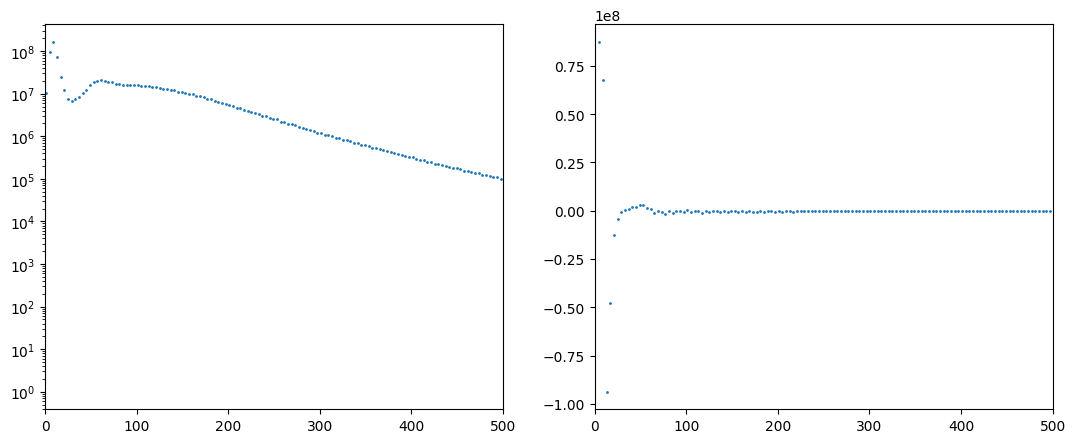

In [70]:
from skimage.filters import sobel

fig,ax=plt.subplots(1,2,figsize=(13,5))
#a=np.copy(img)
hist,bins=np.histogram(img[img>0],bins=int(np.max(img)/4))
diff=np.diff(hist)
ax[0].scatter(bins[:-1],hist,s=1)
ax[1].scatter(bins[1:-1],diff,s=1)
ax[0].set_yscale('log')
ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
#elevation_map = sobel(img)
#ax.imshow(elevation_map)


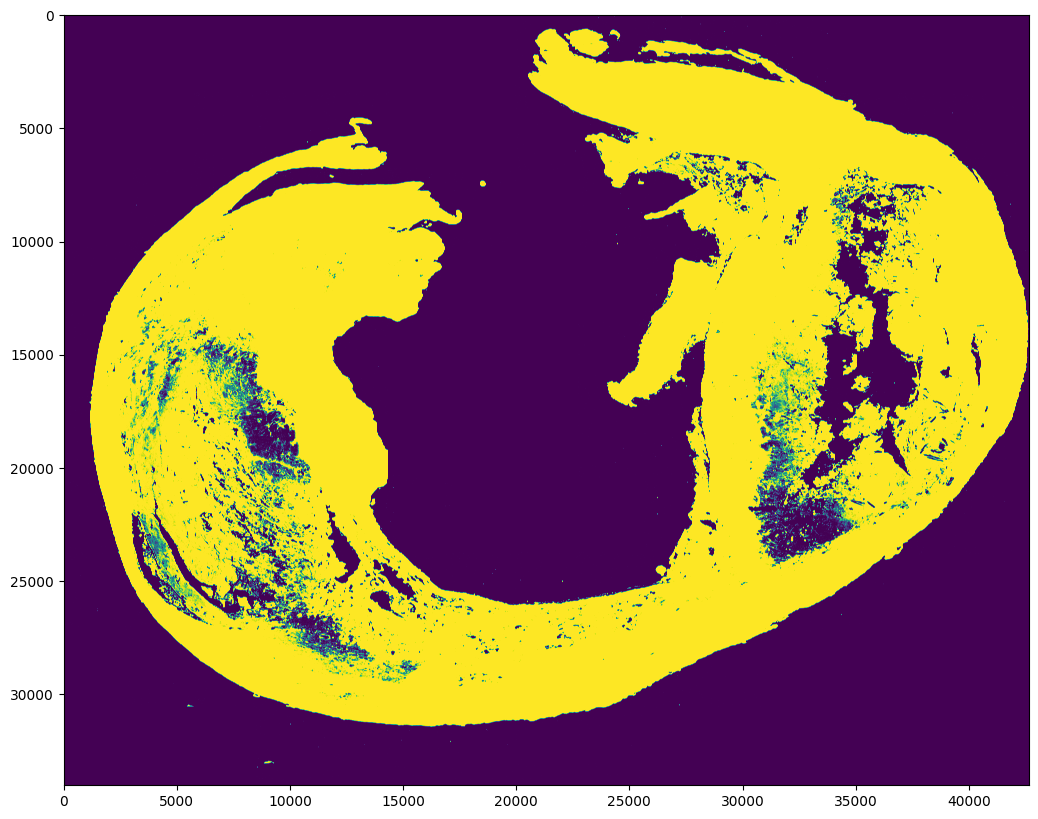

In [71]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
a=np.copy(img)
a[a>50]=np.max(img)
a[a<=50]=np.min(img)
ax.imshow(a)

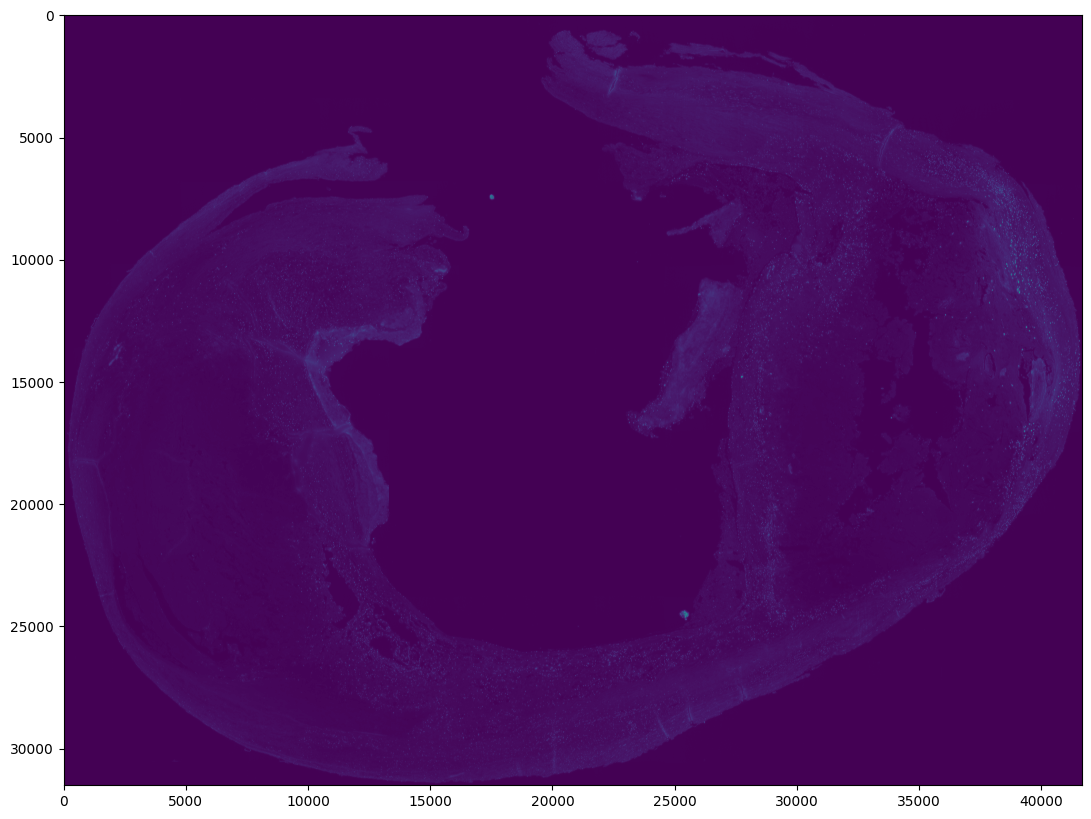

In [15]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.imshow(img[0:31500,1000:])

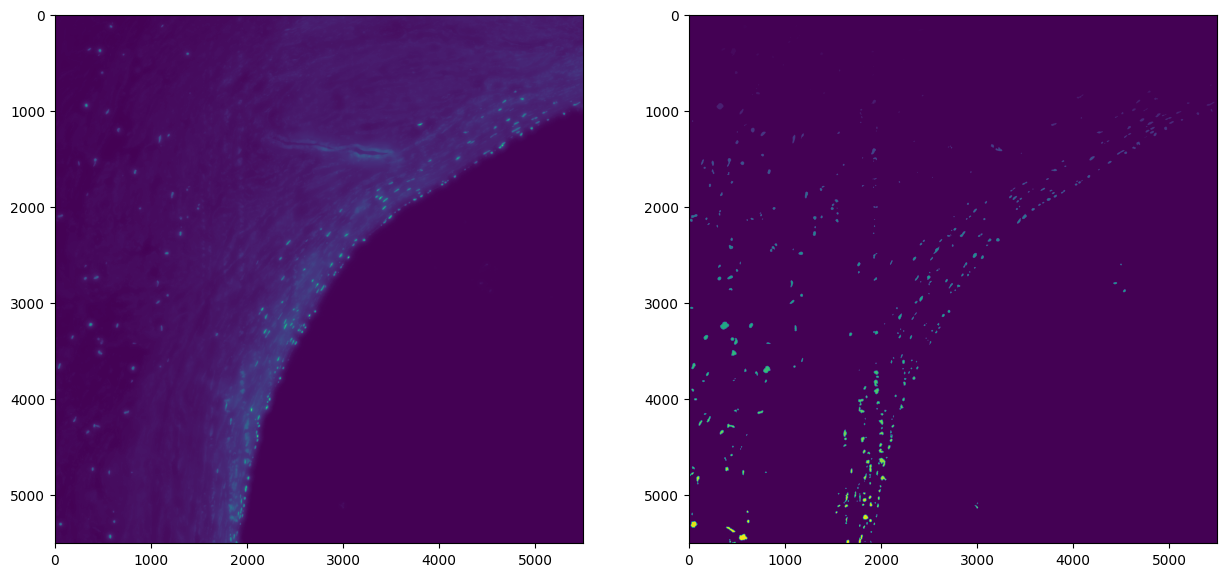

In [38]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(img)
ax[1].imshow(res)
#ax[0].imshow(img[12000:15500,12000:15500])
#ax[1].imshow(res[12000:15500,12000:15500])

In [39]:
img_arr = skimage.segmentation.expand_labels(res, distance=16)

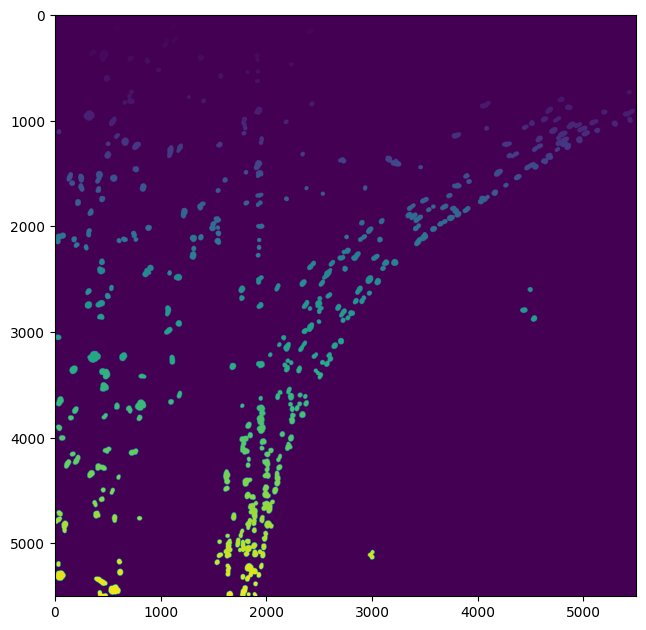

In [40]:
fig,ax=plt.subplots(1,1,figsize=(7.5,10))
ax.imshow(img_arr)
#plt.imshow(img_arr[10000:15500,10000:15500])

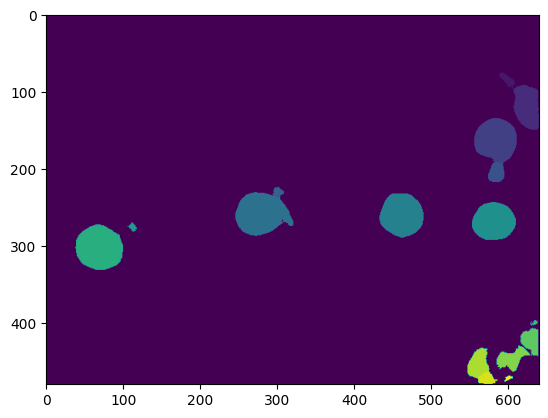

In [10]:


#plt.imshow(img_arr)

In [41]:
skimage.io.imsave(f'/home/unimelb.edu.au/gargerd/Atherosclerosis/xenium_data/processed_data/cell_segmentation/test.tif', img_arr)

/tmp/ipykernel_596456/511123170.py:1: UserWarning: /home/unimelb.edu.au/gargerd/Atherosclerosis/xenium_data/processed_data/cell_segmentation/test.tif is a low contrast image
  skimage.io.imsave(f'/home/unimelb.edu.au/gargerd/Atherosclerosis/xenium_data/processed_data/cell_segmentation/test.tif', img_arr)


In [44]:
a=imread(f'/home/unimelb.edu.au/gargerd/Atherosclerosis/xenium_data/processed_data/cell_segmentation/test.tif')

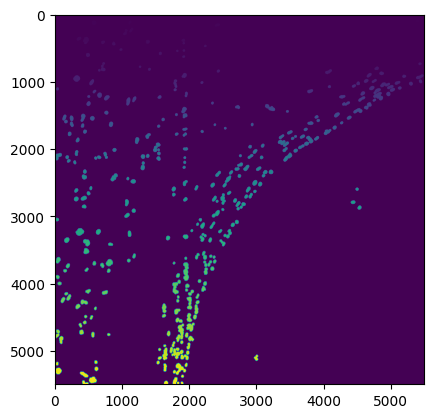

In [46]:
plt.imshow(a)